# A/A - test
Посмотрим как метрика выручки распределена внутри группы control и проведем А/А тест для нее.

А/А тест позволит определить, есть ли статистически значимые различия между двумя одинаковыми группами по среднему значению выручки, "revenue".

Проведем статистический анализ с использованием А/А теста (или двухвыборочного t-теста) для двух групп (группа А1 и группа А2). А/А тест позволяет определить, есть ли статистически значимые различия между двумя одинаковыми группами по какому-либо параметру. В данном случае параметром является "revenue" (выручка от пользователя).

для дополнительных экспериментов с двухвыборочным t-тестом, предлагаю посмотреть страничку на Evan Miller:
https://www.evanmiller.org/ab-testing/t-test.html

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import hashlib

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# прочитаем данные
path = 'AAtest_data.csv'
aa_df = pd.read_csv(path)

In [3]:
aa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3026 entries, 0 to 3025
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       3026 non-null   int64  
 1   variant_name  3026 non-null   object 
 2   revenue       3026 non-null   float64
 3   group         3026 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 94.7+ KB


In [4]:
aa_df.head(3)

,user_id,variant_name,revenue,group
0,9468,control,8.528105,A1
1,3766,control,9.481786,A2
2,1003,control,4.697286,A2


In [5]:
aa_df['group'].value_counts()

group
A2    1523
A1    1503
Name: count, dtype: int64

Сколько уникальных пользователей участвовало в эксперименте всего?

In [6]:
aa_df['user_id'].nunique()

2390

Есть ли в дата сете  пользователи, которые попали в обе группы?

In [7]:
user_group_counts = aa_df.groupby('user_id')['group'].nunique()
users_in_multiple_groups = user_group_counts[user_group_counts > 1]
len(users_in_multiple_groups)

0

Отлично. Пересечений в группах нет. Система деления трафика сработала корректно!

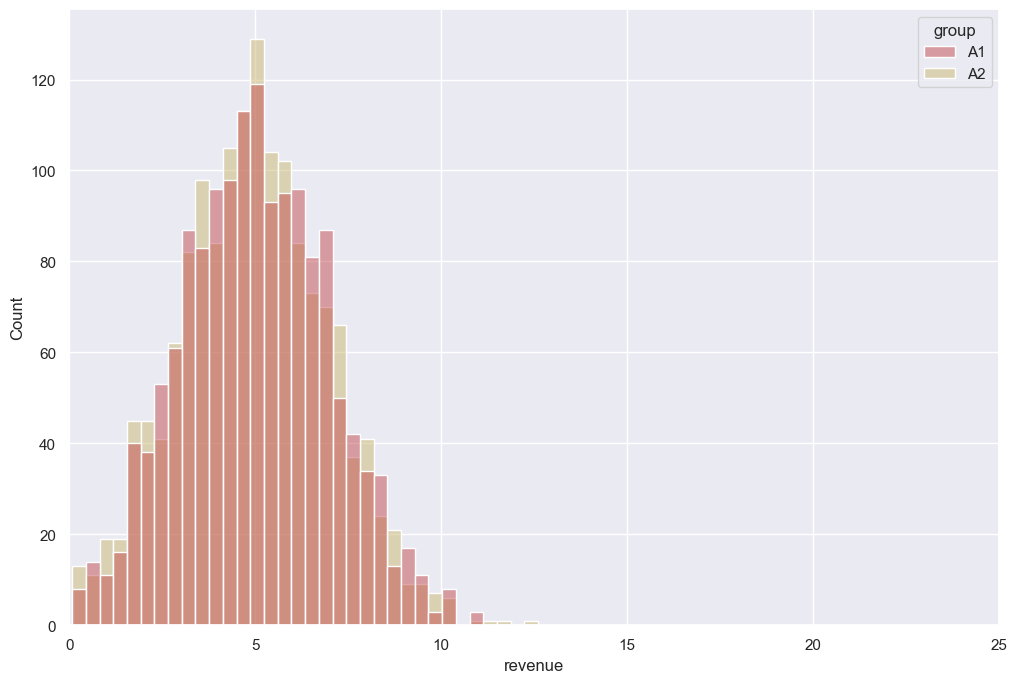

In [8]:
# посмотрим на распределение метрики 
sns.set(rc={'figure.figsize':(12,8)})

groups = sns.histplot(data = aa_df, 
              x='revenue', 
              hue='group', 
              palette = ['r', 'y'],
              alpha=0.5,
              kde=False)
plt.xlim(0, 25)  # настройка лимита для оси х

plt.show()

Невооруженным взглядом отличия не видны на графике. Посмотрим, есть ли различия при помощи статистического теста.

In [10]:
# статистический тест на наличие различий в тестовых группах

alpha = 0.05
aa_p_value = stats.ttest_ind(aa_df[aa_df.group == "A1"].revenue,
                aa_df[aa_df.group == "A2"].revenue,
                equal_var=False).pvalue
print(aa_p_value)
if aa_p_value > alpha:
    print('Группы стат значимо не отличаются. Нельзя отвергнуть нулевую гипотезу.')
else:
    print('Отличие в группах статистически значимо. Отвергаем нулевую гипотезу в пользу альтернативной.')

0.4067667412535527
Группы стат значимо не отличаются. Нельзя отвергнуть нулевую гипотезу.


Отлично! Группы А1 и А2 стат значимо не отличаются. Данные в порядке: система сплитования сработала корректно, метрика пригодна и для А/В тестирования.